#### Imports


In [1]:
import pandas as pd
import numpy as np
from pandas_datareader.data import DataReader
import matplotlib.pyplot as plt 
import yfinance as yf

### Data extraction

In [2]:
start_date = "2017-01-01"
end_date = "2022-06-01"
symbol = "SPY"


df = yf.download(symbol, start=start_date, end=end_date)
df.head(3)

[*********************100%%**********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2017-01-03,225.039993,225.830002,223.880005,225.240005,200.629715,91366500
2017-01-04,225.619995,226.750000,225.610001,226.580002,201.823257,78744400
2017-01-05,226.270004,226.580002,225.479996,226.399994,201.662933,78379000


#### Feature Adjustments

In [3]:
 # Add moving averages
df["MA_12"] = df["Adj Close"].rolling(window=12).mean()
df["MA_21"] = df["Adj Close"].rolling(window=21).mean()
df.loc[df["MA_12"] > df["MA_21"], "Signal"] = 1
df.loc[df["MA_12"] <= df["MA_21"], "Signal"] = 0
df.tail(3)

,Open,High,Low,Close,Adj Close,Volume,MA_12,MA_21,Signal
Date,,,,,,,,,
2022-05-26,398.670013,407.040009,398.450012,405.309998,395.686707,82168300,387.220945,394.305545,0.0
2022-05-27,407.910004,415.380005,407.700012,415.260010,405.400513,84768700,389.052241,393.722117,0.0
2022-05-31,413.549988,416.459991,410.029999,412.929993,403.125824,95937000,390.727341,393.765353,0.0


In [4]:
# Add returns
df["lrets_bench"] = np.log(df["Adj Close"] / df["Adj Close"].shift(1))
df["lrets_prod_bench"] = df["lrets_bench"].cumsum()
df["prod_bench"] = np.exp(df["lrets_prod_bench"]) - 1
df.head(3)

,Open,High,Low,Close,Adj Close,Volume,MA_12,MA_21,Signal,lrets_bench,lrets_prod_bench,prod_bench
Date,,,,,,,,,,,,
2017-01-03,225.039993,225.830002,223.880005,225.240005,200.629715,91366500,NaN,NaN,NaN,NaN,NaN,NaN
2017-01-04,225.619995,226.750000,225.610001,226.580002,201.823257,78744400,NaN,NaN,NaN,0.005931,0.005931,0.005949
2017-01-05,226.270004,226.580002,225.479996,226.399994,201.662933,78379000,NaN,NaN,NaN,-0.000795,0.005137,0.005150


In [5]:
# Add strategy returns
df["lrets_strat"] = np.log(df["Open"] / df["Open"].shift(-1) / df["Open"]) * df["Signal"]
df["lrets_prod_strat"] = df["lrets_strat"].cumsum()
df["prod_bench"] = np.exp(df["lrets_prod_strat"]) - 1
df.tail(3)

,Open,High,Low,Close,Adj Close,Volume,MA_12,MA_21,Signal,lrets_bench,lrets_prod_bench,prod_bench,lrets_strat,lrets_prod_strat
Date,,,,,,,,,,,,,,
2022-05-26,398.670013,407.040009,398.450012,405.309998,395.686707,82168300,387.220945,394.305545,0.0,0.019784,0.679162,-1.0,-0.0,-5465.959763
2022-05-27,407.910004,415.380005,407.700012,415.260010,405.400513,84768700,389.052241,393.722117,0.0,0.024253,0.703415,-1.0,-0.0,-5465.959763
2022-05-31,413.549988,416.459991,410.029999,412.929993,403.125824,95937000,390.727341,393.765353,0.0,-0.005627,0.697788,NaN,NaN,NaN


In [6]:
# Remove NaN's
df.dropna(inplace=True)

In [7]:
# Review df
print("DF Length: ", len(df))
df.head()

DF Length:  1341


,Open,High,Low,Close,Adj Close,Volume,MA_12,MA_21,Signal,lrets_bench,lrets_prod_bench,prod_bench,lrets_strat,lrets_prod_strat
Date,,,,,,,,,,,,,,
2017-02-01,227.529999,228.589996,226.940002,227.619995,202.749680,79117700,202.640526,202.282216,1.0,0.000396,0.010511,-0.995607,-5.427678,-5.427678
2017-02-02,227.619995,228.100006,226.820007,227.770004,202.883240,69657600,202.753354,202.389526,1.0,0.000659,0.011170,-0.999981,-5.432936,-10.860613
2017-02-03,228.820007,229.550003,228.460007,229.339996,204.281769,80563200,202.945610,202.506598,1.0,0.006870,0.018039,-1.000000,-5.433154,-16.293767
2017-02-06,228.869995,229.330002,228.539993,228.929993,203.916519,57790100,203.169779,202.613912,1.0,-0.001790,0.016250,-1.000000,-5.435380,-21.729147
2017-02-07,229.380005,229.660004,228.720001,228.940002,203.925446,57931200,203.333085,202.687294,1.0,0.000044,0.016293,-1.000000,-5.433460,-27.162607


#### Plot Results


KeyError: 'prod_strat'

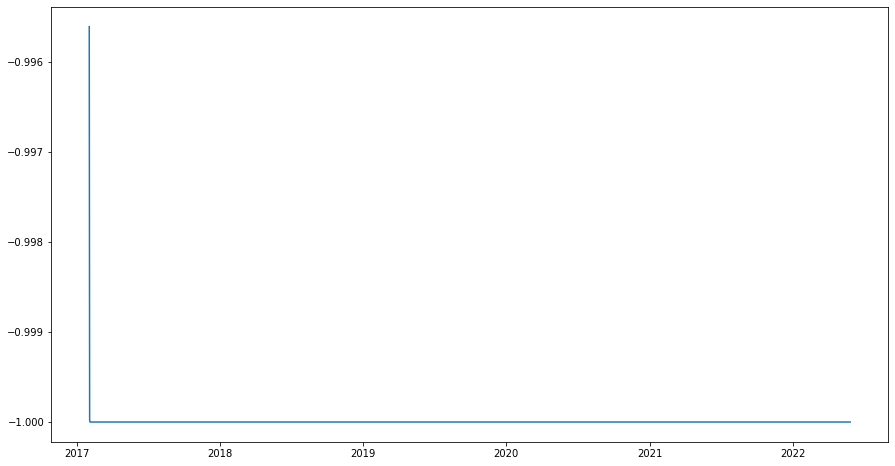

In [8]:
# show graph 
fig = plt.figure(figsize=(15, 8))
plt.plot(df["prod_bench"])
plt.plot(df["prod_strat"])
plt.show()
